# Creating final data for crop and fertilizer recommendation system

import necessary dependencies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [15]:
fertilizer_data_path = '../raw-data-prepare/fertilizer_prepare.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [16]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,12,kidneybeans,20,60,20,5.5
3,18,blackgram,40,60,20,5.0
4,60,pomegranate,20,10,40,5.5


In [17]:
# delete "Unnamed: 0" columns
del merge_fert['Unnamed: 0']

In [18]:
merge_fert.describe()

,N,P,K,pH
count,17.000000,17.000000,17.000000,17.000000
mean,58.235294,43.823529,52.941176,5.382353
std,37.788109,36.764853,56.763182,0.673828
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,10.000000,20.000000,5.000000
50%,50.000000,40.000000,40.000000,5.500000
75%,100.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [19]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'kidneybeans', 'blackgram', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

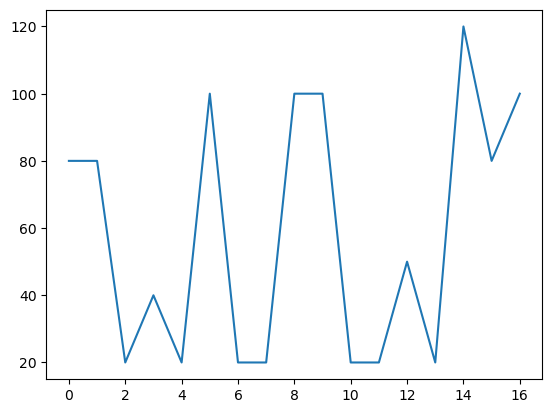

In [20]:
plt.plot(merge_fert["N"])

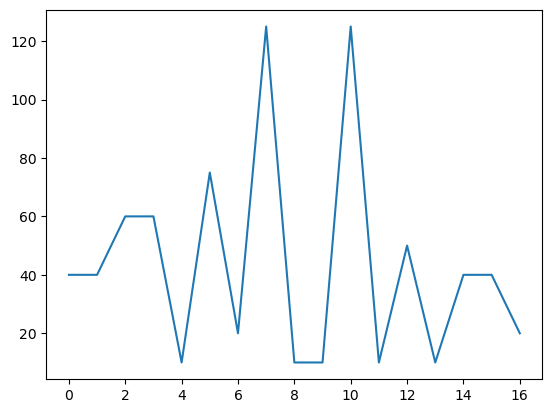

In [21]:
plt.plot(merge_fert["P"])

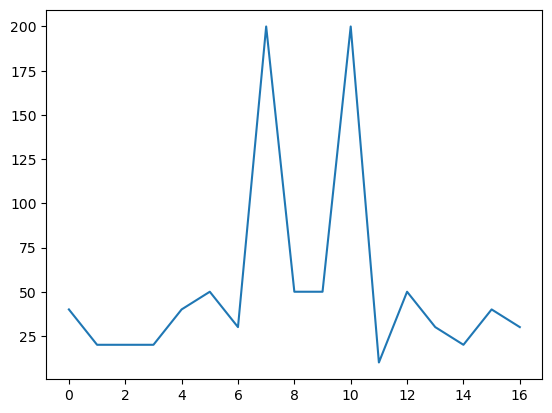

In [22]:
plt.plot(merge_fert["K"])

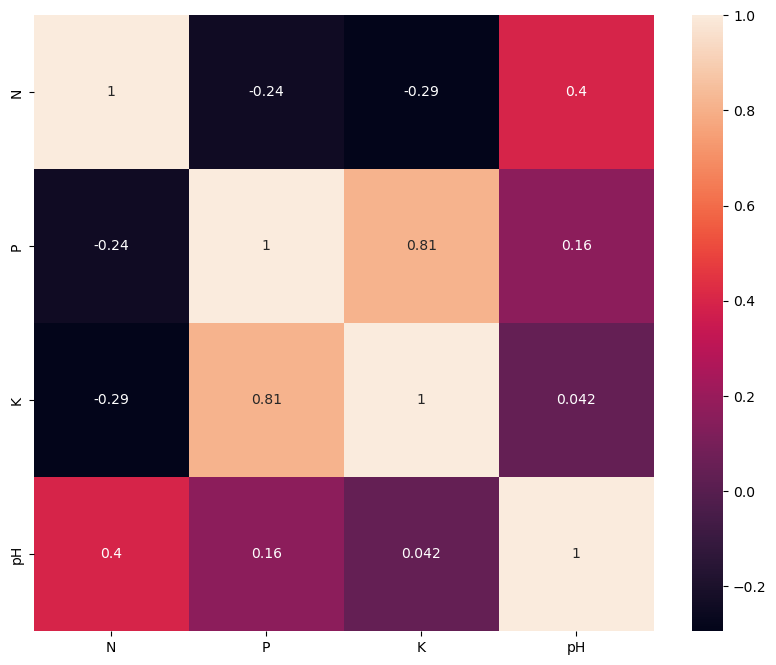

In [26]:
# Select only numeric columns for the correlation matrix
numeric_data = merge_fert.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [28]:
merge_crop = pd.read_csv('../raw-data-prepare/crop_prepare.csv')
reco_fert = merge_fert

In [29]:
reco_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,kidneybeans,20,60,20,5.5
3,blackgram,40,60,20,5.0
4,pomegranate,20,10,40,5.5
5,banana,100,75,50,6.5
6,mango,20,20,30,5.0
7,grapes,20,125,200,4.0
8,watermelon,100,10,50,5.5
9,muskmelon,100,10,50,5.5


In [37]:
import random

# Create a list to store the rows
temp_data = []

for i in range(merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    temp_data.append({"N": N, "P": P, "K": K})

# Create the DataFrame from the list
temp = pd.DataFrame(temp_data)

In [38]:
temp

,N,P,K
0,61,50,44
1,81,57,41
2,85,41,45
3,90,47,43
4,82,37,35
...,...,...,...
1695,115,19,55
1696,112,13,55
1697,99,21,51
1698,91,19,52


In [39]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [40]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,61,50,44
1,1,21.770462,80.319644,7.038096,226.655537,rice,81,57,41
2,2,23.004459,82.320763,7.840207,263.964248,rice,85,41,45
3,3,26.491096,80.158363,6.980401,242.864034,rice,90,47,43
4,4,20.130175,81.604873,7.628473,262.717340,rice,82,37,35
...,...,...,...,...,...,...,...,...,...
1695,3095,25.287846,89.636679,6.765095,58.286977,watermelon,115,19,55
1696,3096,26.638386,84.695469,6.189214,48.324286,watermelon,112,13,55
1697,3097,25.331045,84.305338,6.904242,41.532187,watermelon,99,21,51
1698,3098,26.897502,83.892415,6.463271,43.971937,watermelon,91,19,52


In [41]:
del merge_crop['Unnamed: 0']

In [42]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,61,50,44
1,21.770462,80.319644,7.038096,226.655537,rice,81,57,41
2,23.004459,82.320763,7.840207,263.964248,rice,85,41,45
3,26.491096,80.158363,6.980401,242.864034,rice,90,47,43
4,20.130175,81.604873,7.628473,262.717340,rice,82,37,35
...,...,...,...,...,...,...,...,...
1695,25.287846,89.636679,6.765095,58.286977,watermelon,115,19,55
1696,26.638386,84.695469,6.189214,48.324286,watermelon,112,13,55
1697,25.331045,84.305338,6.904242,41.532187,watermelon,99,21,51
1698,26.897502,83.892415,6.463271,43.971937,watermelon,91,19,52


In [43]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [45]:
merge_crop.to_csv("../data-processed/crop_recommendation.csv",index=False)